# Data Science and Big Data Project1
## Intermediate Progress
Group 14: Honda Zhang, Jessica Zhu

**Summary:** By now, we basically finished two parts: *data collection and cleaning, finding countries sharing similar music tastes.*

**1. Data collection and cleaning**
Our current dataset has three components:
- Weekly top 200 songs from 59 countries (2017-2019): `top_songs_country.csv`
- Audio features for each song: `audio_features.csv`
- Lyrics for each song (only English songs): `lyrics.csv`

To get these datasets, we created several python files and jupyter notebooks to scrap data from Spotify API and Genius API and clean the data. We included all these files in the zip file. Below is the brief instruction of all those files:

- `top_200_songs_scrapper.py`: scraping weekly top 200 songs from 59 countries and store data from each country as a csv file separately.
- `total_rank_df.py`: read weekly top 200 songs from each country and use the total counts of each songs to re-rank songs and store the result as a csv file separtely.
- `get_track_features.py`: scraping audio features for all the songs in our dataset from Spotify API.
- `scrap_lyrics.ipynb`: scraping lyrics from Genius API.

**2. Finding countries sharing similar music tastes**
To define similarity for music taste, we tried two methods: 
- couting number of same songs in top 100 songs
- create one-hot-encoding features and clustering

To see the details of this part, please see the below cells in this notebook.

**Next Steps**:
1. Improving current methods of finding similar countries: currently we used one-hot-encoding, we might find a creative way to incorporate ranking information in the encoding part and then clustering.
2. Analysing audio features and lyrics for each group of countries: need to figure out a better way to presenting findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mapping_df = pd.read_csv('region_mapping.csv', header=None)
list_of_ac = mapping_df[0].tolist()
list_of_full = mapping_df[1].tolist()
countries = list(zip(list_of_ac, list_of_full))

In [112]:
df_rank = pd.DataFrame()
for country in countries:
    file_name = 'total_rank_data/' + country[0] + '.csv'
    temp = pd.read_csv(file_name)
    famous_song_series = temp[['Track Name', 'spotify_id']][:100]
    famous_song_df = pd.DataFrame({'Name': famous_song_series['Track Name'],\
                                   'spotify_id': famous_song_series['spotify_id'],
                                   'Country': country[1]})
    df_rank = df_rank.append(famous_song_df)
df_rank.head()

,Name,spotify_id,Country
0,Crimen,3oqWr0jDWNXxWufNogGREp,Argentina
1,Creo,5Bi9Cq5oVFy1OtUgecbegZ,Argentina
2,Spaghetti del Rock,6rg1MBZqggsQ5olFGTw0rr,Argentina
3,Nunca quise,0ZAJ660VP57lLK4U7NlGOy,Argentina
4,Me Gusta,3pMo77B4r1NwwIK78lO4xf,Argentina


In [113]:
df_rank = df_rank.reset_index()
df_rank = df_rank.rename(columns = {'index':'rank'})
df_rank.head()

,rank,Name,spotify_id,Country
0,0,Crimen,3oqWr0jDWNXxWufNogGREp,Argentina
1,1,Creo,5Bi9Cq5oVFy1OtUgecbegZ,Argentina
2,2,Spaghetti del Rock,6rg1MBZqggsQ5olFGTw0rr,Argentina
3,3,Nunca quise,0ZAJ660VP57lLK4U7NlGOy,Argentina
4,4,Me Gusta,3pMo77B4r1NwwIK78lO4xf,Argentina


In [114]:
df_rank.to_csv('top_songs_country.csv')

In [6]:
country_matrix_rank = pd.DataFrame(columns=[country[1] for country in countries])

In [12]:
for country in countries:
    score_list = []
    current_temp = df_rank[df_rank['Country'] == country[1]]
    for counterparty in country_matrix_rank.iteritems():
        counterparty_temp = df_rank[df_rank['Country'] == counterparty[0]]
        temp = counterparty_temp.merge(current_temp, left_on='Name', right_on='Name')
        score_list.append(len(temp)/len(current_temp))
    country_matrix_rank.loc[country[1]] = score_list
country_matrix_rank

,Argentina,Austria,Australia,Belgium,Bolivia,Brazil,Canada,Switzerland,Chile,Colombia,...,Sweden,Singapore,Slovakia,El Salvador,Thailand,Turkey,Taiwan,United States,Uruguay,Vietnam
Argentina,1.000000,0.080000,0.090000,0.10000,0.570000,0.060000,0.080000,0.10000,0.560000,0.450000,...,0.090000,0.100000,0.070000,0.520000,0.060000,0.030000,0.080000,0.030000,0.720000,0.08000
Austria,0.080000,1.000000,0.420000,0.57000,0.090000,0.090000,0.370000,0.60000,0.070000,0.080000,...,0.460000,0.260000,0.430000,0.140000,0.140000,0.070000,0.160000,0.250000,0.060000,0.23000
Australia,0.090000,0.420000,1.020000,0.58000,0.110000,0.140000,0.660000,0.49000,0.100000,0.110000,...,0.460000,0.360000,0.400000,0.180000,0.220000,0.080000,0.210000,0.520000,0.070000,0.25000
Belgium,0.100000,0.570000,0.580000,1.02000,0.120000,0.130000,0.470000,0.70000,0.100000,0.140000,...,0.510000,0.410000,0.530000,0.210000,0.210000,0.100000,0.220000,0.330000,0.100000,0.31000
Bolivia,0.570000,0.090000,0.110000,0.12000,1.000000,0.080000,0.100000,0.13000,0.570000,0.630000,...,0.090000,0.130000,0.090000,0.710000,0.090000,0.050000,0.080000,0.070000,0.660000,0.10000
Brazil,0.060000,0.090000,0.140000,0.13000,0.080000,1.000000,0.120000,0.11000,0.040000,0.060000,...,0.110000,0.130000,0.100000,0.100000,0.080000,0.060000,0.080000,0.090000,0.060000,0.12000
Canada,0.080000,0.370000,0.660000,0.47000,0.100000,0.120000,1.000000,0.45000,0.080000,0.120000,...,0.370000,0.310000,0.370000,0.180000,0.200000,0.100000,0.200000,0.790000,0.070000,0.23000
Switzerland,0.100000,0.600000,0.490000,0.70000,0.130000,0.110000,0.450000,1.02000,0.110000,0.120000,...,0.510000,0.330000,0.510000,0.200000,0.160000,0.100000,0.190000,0.320000,0.100000,0.26000
Chile,0.560000,0.070000,0.100000,0.10000,0.570000,0.040000,0.080000,0.11000,1.000000,0.530000,...,0.080000,0.070000,0.040000,0.550000,0.050000,0.040000,0.070000,0.050000,0.560000,0.05000
Colombia,0.450000,0.080000,0.110000,0.14000,0.630000,0.060000,0.120000,0.12000,0.530000,1.000000,...,0.090000,0.130000,0.080000,0.630000,0.070000,0.050000,0.100000,0.070000,0.470000,0.09000


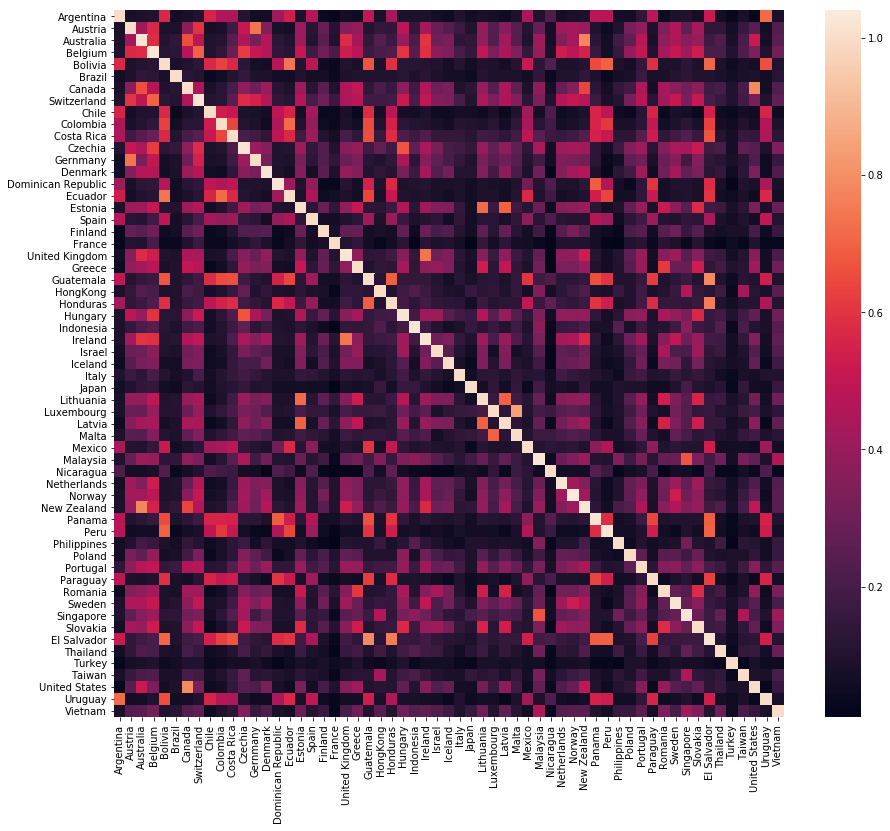

In [23]:
plt.figure(figsize = (15,13))
sns.heatmap(country_matrix_rank)

From this plot, we can see that some of the countries share similar music tastes. However, it's hard to use the result to group similar countries. Therefore, we tried to use clustering method the find the similar countries.

df_rank.head(10)

# Clustering

In [115]:
# first use one-hot-encoding to create features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [116]:
ohe_features = enc.fit_transform(np.array(df_rank['Name']).reshape(-1,1)).toarray()

In [117]:
enc.categories_

[array(['#ihanaa', "'Di Na Muli", "'Till I Collapse", ..., '鱗(うろこ)',
        '빨간 맛 Red Flavor', '피카부 Peek-A-Boo'], dtype=object)]

In [118]:
df_ohe = pd.DataFrame(ohe_features)

In [119]:
df_ohe['Country'] = df_rank.reset_index()['Country']

In [120]:
# sum ohe features by country
df_ohe = df_ohe.groupby('Country').sum()

In [121]:
df_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# incorporate ranking information into the one hot encoder
def ohe_rank(df_ohe, df_rank, enc):
    df_ohe_rank = df_ohe.copy()
    ohe_dict = {i:enc.categories_[0][i] for i in df_ohe.columns}
    for country in df_ohe.index:
        for song in df_ohe.columns:
            if df_ohe_rank.loc[country][song] == 1:
                df_ohe_rank.loc[country][song] = 100-df_rank[(df_rank['Country'] == country)&
                                                    (df_rank['Name'] == ohe_dict[song])]['rank'] 
                # use 200-rank becuase we want to give higher rank more importance
    return df_ohe_rank

In [123]:
df_ohe_rank = ohe_rank(df_ohe, df_rank, enc)

In [124]:
df_ohe_rank.head()

,0,1,2,3,4,5,6,7,8,9,...,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = None
best_labels = None
best_score = -1
best_model = None

scores_kmeans = {}

for k in range(2, 21):
    
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(df_ohe_rank)
    
    labels = kmeans.labels_
    score = silhouette_score(df_ohe_rank, labels)
    scores_kmeans[k] = score
    print('k =', k, 'has silhouette score', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = kmeans
        best_labels = labels

print()
print("Best k = " + str(best_k), 'according to silhouette score')
print()


k = 2 has silhouette score 0.13800363843096974
k = 3 has silhouette score 0.14508809590487398
k = 4 has silhouette score 0.15343928127481601
k = 5 has silhouette score 0.11216699512978816
k = 6 has silhouette score 0.11318295159065887
k = 7 has silhouette score 0.07306678204485256
k = 8 has silhouette score 0.11823435621468936
k = 9 has silhouette score 0.11317443692374154
k = 10 has silhouette score 0.11588614834617944
k = 11 has silhouette score 0.11581797254290943
k = 12 has silhouette score 0.0801321769544044
k = 13 has silhouette score 0.13436853529123424
k = 14 has silhouette score 0.08669124793293348
k = 15 has silhouette score 0.09632409790416144
k = 16 has silhouette score 0.09121220202610973
k = 17 has silhouette score 0.09161736339091746
k = 18 has silhouette score 0.09229834216411327
k = 19 has silhouette score 0.0904400666390218
k = 20 has silhouette score 0.091557763872078

Best k = 4 according to silhouette score



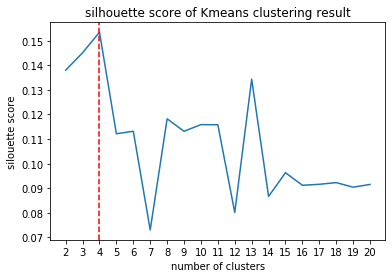

In [48]:
plt.plot(list(scores_kmeans.keys()), list(scores_kmeans.values()))
plt.axvline(x = best_k, color = 'r', linestyle = '--')
plt.xticks(list(scores_kmeans.keys()))
plt.ylabel('silouette score')
plt.xlabel('number of clusters')
plt.title('silhouette score of Kmeans clustering result')
plt.show()

In [51]:
kmeans = KMeans(n_clusters = best_k, random_state = 0)
kmeans.fit(df_ohe_rank)
kmeans_cluster_assignments = kmeans.labels_

In [52]:
df_ohe_rank['Cluster'] = kmeans_cluster_assignments

In [53]:
df_ohe_rank['Cluster'].value_counts()

3    30
1    17
2     9
0     3
Name: Cluster, dtype: int64

In [54]:
df_ohe_rank.groupby('Cluster').get_group(0).index

Index(['Italy', 'Luxembourg', 'Malta'], dtype='object', name='Country')

In [55]:
df_ohe_rank.groupby('Cluster').get_group(1).index

Index(['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
       'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Spain',
       'Uruguay'],
      dtype='object', name='Country')

In [56]:
df_ohe_rank.groupby('Cluster').get_group(2).index

Index(['HongKong', 'Indonesia', 'Japan', 'Malaysia', 'Philippines',
       'Singapore', 'Taiwan', 'Thailand', 'Vietnam'],
      dtype='object', name='Country')

In [57]:
df_ohe_rank.groupby('Cluster').get_group(3).index

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Gernmany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Latvia', 'Lithuania',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'],
      dtype='object', name='Country')

In [133]:
cluster_regions = ['Italy, Luxembourg, Malta', 'South America', 'Southeast Asia', 'European & North America']

In [59]:
group_0 = df_rank.loc[df_rank['Country'].isin(list(df_ohe_rank.groupby('Cluster').get_group(0).index))]
group_1 = df_rank.loc[df_rank['Country'].isin(list(df_ohe_rank.groupby('Cluster').get_group(1).index))]
group_2 = df_rank.loc[df_rank['Country'].isin(list(df_ohe_rank.groupby('Cluster').get_group(2).index))]
group_3 = df_rank.loc[df_rank['Country'].isin(list(df_ohe_rank.groupby('Cluster').get_group(3).index))]

In [60]:
group_0.head()

,rank,Name,spotify_id,Country
3000,0,Veleno 6,7GfXjqXD9aBvDoBdZ7EwPH,Italy
3001,1,La musica non c'è,5IKWRPO5NGaeNIXF4rkbfZ,Italy
3002,2,Allenamento #2,1FDtcvnTZvbwMFxn5SRFHN,Italy
3003,3,Chic,7jUJ2RmT4PFHHq4goMWqm3,Italy
3004,4,Pianeti,2w5wtWq30yTkNSG9YjMFvW,Italy


# Analysis Track Features
https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/

In [63]:
track_features = pd.read_csv('audio_features.csv')

In [64]:
track_features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.799,0.722,7,-5.051,1,0.0387,0.35900,0.000000,0.178,0.880,128.012,audio_features,2EhvCzRw0C7anZHsj284oX,spotify:track:2EhvCzRw0C7anZHsj284oX,https://api.spotify.com/v1/tracks/2EhvCzRw0C7a...,https://api.spotify.com/v1/audio-analysis/2Ehv...,176906,4
1,1,0.553,0.964,0,-6.710,1,0.0568,0.00221,0.017600,0.060,0.530,133.935,audio_features,6BI4NrjNsQfac2erXVjSVf,spotify:track:6BI4NrjNsQfac2erXVjSVf,https://api.spotify.com/v1/tracks/6BI4NrjNsQfa...,https://api.spotify.com/v1/audio-analysis/6BI4...,220177,4
2,2,0.668,0.816,9,-3.708,0,0.0322,0.03110,0.000025,0.195,0.550,129.975,audio_features,3CZoTwEuhvrokhej4VAo0Q,spotify:track:3CZoTwEuhvrokhej4VAo0Q,https://api.spotify.com/v1/tracks/3CZoTwEuhvro...,https://api.spotify.com/v1/audio-analysis/3CZo...,253027,4
3,3,0.547,0.881,4,-5.994,0,0.3100,0.11100,0.000000,0.386,0.440,86.628,audio_features,7CbkW1lLxOM5D6YWTnzknv,spotify:track:7CbkW1lLxOM5D6YWTnzknv,https://api.spotify.com/v1/tracks/7CbkW1lLxOM5...,https://api.spotify.com/v1/audio-analysis/7Cbk...,166486,4
4,4,0.639,0.745,0,-3.631,1,0.0416,0.11000,0.000000,0.131,0.356,139.993,audio_features,4ffYbqNOSn01NHOmQGJEKT,spotify:track:4ffYbqNOSn01NHOmQGJEKT,https://api.spotify.com/v1/tracks/4ffYbqNOSn01...,https://api.spotify.com/v1/audio-analysis/4ffY...,193948,4


In [67]:
group_0_audio = pd.merge(group_0, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_1_audio = pd.merge(group_1, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_2_audio = pd.merge(group_2, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_3_audio = pd.merge(group_3, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')

In [180]:
hist_columns = list(track_features.columns[:12]) + list(track_features.columns[-2:-1])
hist_columns.remove('mode')
hist_columns.remove('Unnamed: 0')

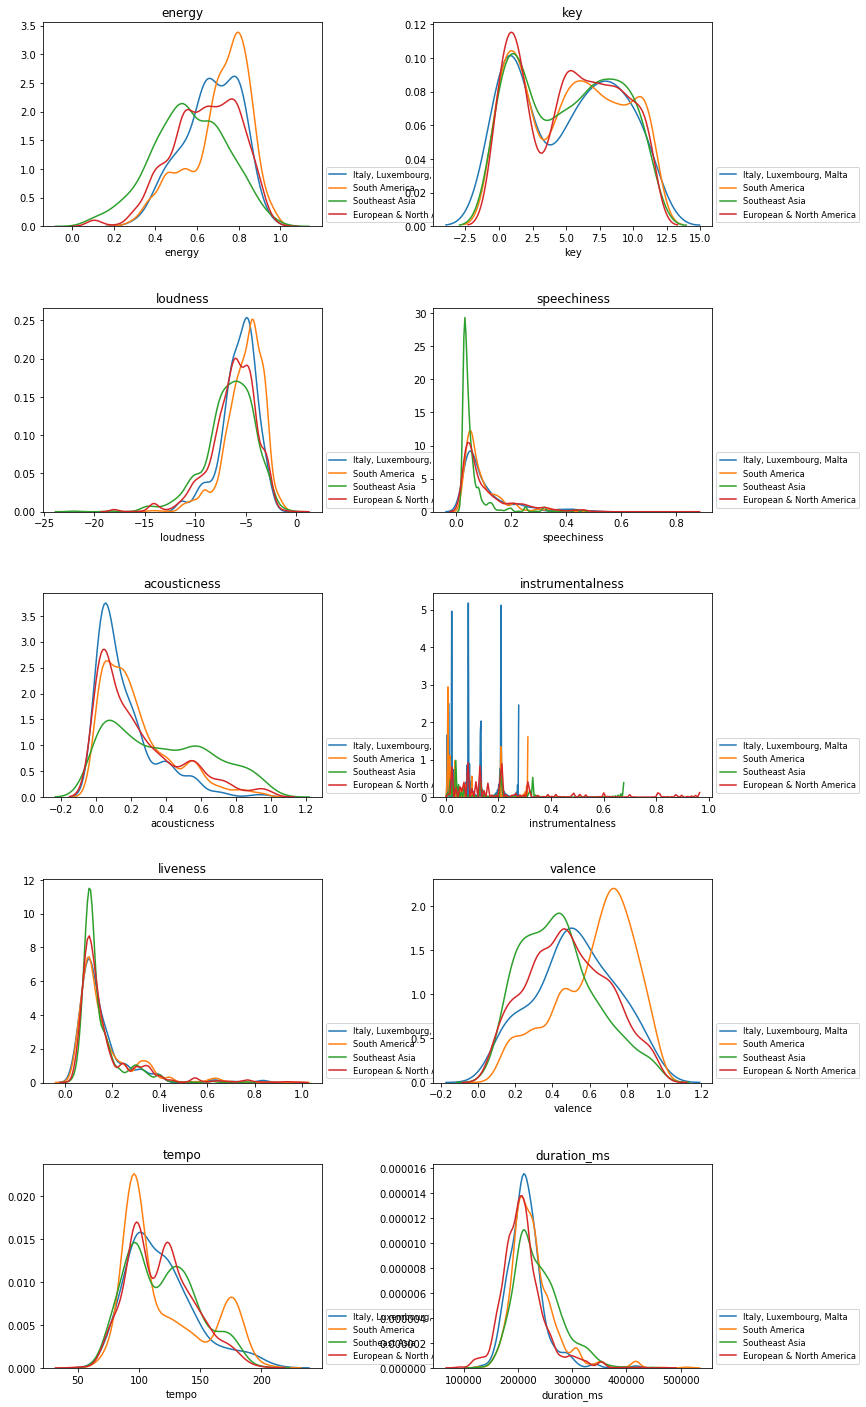

In [219]:
fig = plt.figure(figsize = (12,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 11):
    ax = fig.add_subplot(6, 2, i)
    l1=sns.distplot(group_0_audio[hist_columns[i]], hist = False, label = cluster_regions[0])
    l2=sns.distplot(group_1_audio[hist_columns[i]], hist = False, label = cluster_regions[1])
    l3=sns.distplot(group_2_audio[hist_columns[i]], hist = False, label = cluster_regions[2])
    l4=sns.distplot(group_3_audio[hist_columns[i]], hist = False, label = cluster_regions[3])
    ax.set_title(hist_columns[i])
    ax.legend(fontsize = 'small', loc = 'lower left', bbox_to_anchor=(1, 0))

plt.show()

In [227]:
group_0_audio['key'].value_counts()

1     43
0     43
8     30
11    28
9     25
2     23
7     22
6     22
5     21
10    15
4      6
3      5
Name: key, dtype: int64

In [228]:
group_1_audio['key'].value_counts()

11    216
1     200
0     196
2     168
5     153
6     150
7     149
9     139
8     114
4      96
10     85
3      34
Name: key, dtype: int64

In [229]:
group_2_audio['key'].value_counts()

1     109
0     101
2      91
7      86
9      83
8      75
10     74
4      65
5      63
11     62
6      60
3      31
Name: key, dtype: int64

## Lyrics Analysis

In [220]:
lyrics = pd.read_csv('lyrics.csv')

In [221]:
lyrics.head()

,Unnamed: 0,Track Name,Artist,spotify_id,lyrics
0,0,Closer (feat. Halsey),The Chainsmokers,7BKLCZ1jbUBVqRi2FVlTVw,"\n\n2014\n""#SELFIE""\n\n2016\n""Roses"" (feat. RO..."
1,1,Say You Won't Let Go,James Arthur,5uCax9HTNlzGybIStD3vDh,\n\n[Verse 1]\nI remember when you were all mi...
2,2,Photograph,Ed Sheeran,6fxVffaTuwjgEk5h9QyRjy,"\n\n[Verse 1]\nLoving can hurt, loving can hur..."
3,3,A Thousand Years,Christina Perri,6lanRgr6wXibZr8KgzXxBl,\n\n[Instrumental]\n\n
4,4,Faded,Alan Walker,698ItKASDavgwZ3WjaWjtz,\n\n[Verse]\nYou were the shadow to my light\n...


In [222]:
len(lyrics)

45469

In [223]:
# preprocessing text
import spacy
nlp = spacy.load('en', disable=['ner'], max_length = 1000000000)

In [225]:
corpus = [nlp(text) for text in list(lyrics['lyrics'])]

In [232]:
# create tokenized text
corpus_token = []
for doc in corpus:
    tokens = []
    for token in doc:
        lemma = token.lemma_.lower()
        if not (token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
            tokens.append(lemma)
    corpus_token.append(tokens)

In [234]:
lyrics['token'] = corpus_token

In [235]:
lyrics.head()

,Unnamed: 0,Track Name,Artist,spotify_id,lyrics,token
0,0,Closer (feat. Halsey),The Chainsmokers,7BKLCZ1jbUBVqRi2FVlTVw,"\n\n2014\n""#SELFIE""\n\n2016\n""Roses"" (feat. RO...","[2014, #, selfie, 2016, roses, feat, rozes, do..."
1,1,Say You Won't Let Go,James Arthur,5uCax9HTNlzGybIStD3vDh,\n\n[Verse 1]\nI remember when you were all mi...,"[verse, 1, -pron-, remember, when, -pron-, be,..."
2,2,Photograph,Ed Sheeran,6fxVffaTuwjgEk5h9QyRjy,"\n\n[Verse 1]\nLoving can hurt, loving can hur...","[verse, 1, loving, can, hurt, love, can, hurt,..."
3,3,A Thousand Years,Christina Perri,6lanRgr6wXibZr8KgzXxBl,\n\n[Instrumental]\n\n,[instrumental]
4,4,Faded,Alan Walker,698ItKASDavgwZ3WjaWjtz,\n\n[Verse]\nYou were the shadow to my light\n...,"[verse, -pron-, be, the, shadow, to, -pron-, l..."


In [243]:
group_0_lyrics = pd.merge(group_0, lyrics[['spotify_id','token']], 
                          how = 'left', left_on = 'spotify_id', right_on = 'spotify_id')
group_1_lyrics = pd.merge(group_1, lyrics[['spotify_id','token']], 
                          how = 'left', left_on = 'spotify_id', right_on = 'spotify_id')
group_2_lyrics = pd.merge(group_2, lyrics[['spotify_id','token']], 
                          how = 'left', left_on = 'spotify_id', right_on = 'spotify_id')
group_3_lyrics = pd.merge(group_3, lyrics[['spotify_id','token']], 
                          how = 'left', left_on = 'spotify_id', right_on = 'spotify_id')

In [242]:
group_0_lyrics.head()

,rank,Name,spotify_id,Country,token
0,0,Veleno 6,7GfXjqXD9aBvDoBdZ7EwPH,Italy,"[no, lyric, find]"
1,1,La musica non c'è,5IKWRPO5NGaeNIXF4rkbfZ,Italy,"[strofa, 1, la, penna, scrive, la, mente, imma..."
2,2,Allenamento #2,1FDtcvnTZvbwMFxn5SRFHN,Italy,"[intro, mettimi, l'autotune, yeh, ehi, strofa,..."
3,3,Chic,7jUJ2RmT4PFHHq4goMWqm3,Italy,"[intro, eh, eh, eh, izi, ue, ue, ue, ue, e, ue..."
4,4,Pianeti,2w5wtWq30yTkNSG9YjMFvW,Italy,"[strofa, 1, io, ti, aspetto, dove, il, mare, n..."


In [256]:
group_0_tokens = [word for sublist in list(group_0_lyrics['token']) for word in sublist]
group_0_tokens = ' '.join(group_0_tokens)

In [330]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
spacy_stopwords.add('PRON')
spacy_stopwords.add('oh')
spacy_stopwords.add('yeah')
spacy_stopwords.add('que')
spacy_stopwords.add('che')
spacy_stopwords.add('la')
spacy_stopwords.add('el')
spacy_stopwords.add('eh')
spacy_stopwords.add('ooh')
spacy_stopwords.add('doo')
spacy_stopwords.add('en')
spacy_stopwords.add('na')
spacy_stopwords.add('yo')
spacy_stopwords.add('chorus')
spacy_stopwords.add('pre')
spacy_stopwords.add('li')
spacy_stopwords.add('di')
spacy_stopwords.add('un')
spacy_stopwords.add('yeh')
spacy_stopwords.add('verse')
spacy_stopwords.add('il')
spacy_stopwords.add('non')
spacy_stopwords.add('mi')
spacy_stopwords.add('uh')
spacy_stopwords.add('ma')
spacy_stopwords.add('da')
spacy_stopwords.add('de')
spacy_stopwords.add('like')
spacy_stopwords.add('hol')

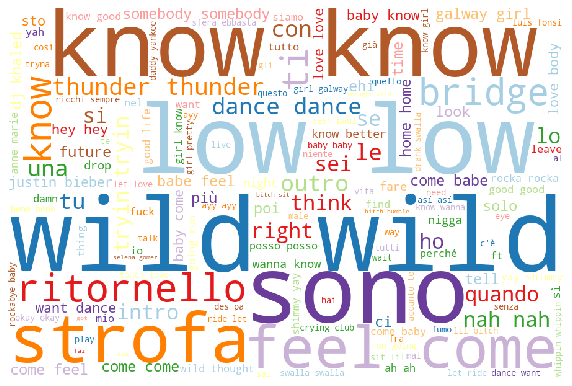

In [338]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Word cloud
plt.figure(figsize = (10,10))
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=spacy_stopwords,
                          colormap = 'Paired',
                          max_words=150,
                          max_font_size=200, 
                          width=900, 
                          height=600,
                          random_state=1234
                         ).generate(group_0_tokens)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("group_0_wordcloud.png", dpi=1000)

In [277]:
group_1_tokens = [word for sublist in list(group_1_lyrics['token']) for word in sublist]
group_1_tokens = ' '.join(group_1_tokens)

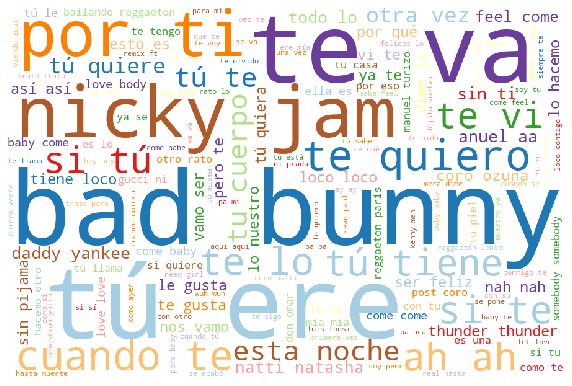

In [337]:
plt.figure(figsize = (10,10))
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=spacy_stopwords,
                          colormap = 'Paired',
                          max_words=150,
                          max_font_size=200, 
                          width=900, 
                          height=600,
                          random_state=1234
                         ).generate(group_1_tokens)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("group_1_wordcloud.png", dpi=1000)

In [283]:
group_2_tokens = [word for sublist in list(group_2_lyrics['token']) for word in sublist]
group_2_tokens = ' '.join(group_2_tokens)

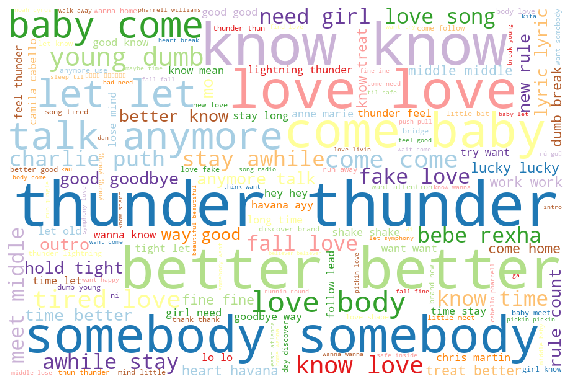

In [336]:
plt.figure(figsize = (10,10))
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=spacy_stopwords,
                          colormap = 'Paired',
                          max_words=150,
                          max_font_size=200, 
                          width=900, 
                          height=600,
                          random_state=1234
                         ).generate(group_2_tokens)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("group_1_wordcloud.png", dpi=1000)

In [293]:
group_3_tokens = [word for sublist in list(group_3_lyrics['token']) for word in sublist]
group_3_tokens = ' '.join(group_3_tokens)

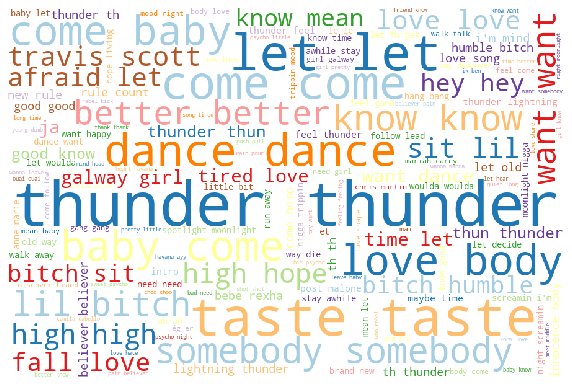

In [335]:
plt.figure(figsize = (10,10))
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=spacy_stopwords,
                          colormap = 'Paired',
                          max_words=150,
                          max_font_size=200, 
                          width=900, 
                          height=600,
                          random_state=1234
                         ).generate(group_3_tokens)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("group_1_wordcloud.png", dpi=1000)